In [260]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib

import matplotlib.pyplot as plt

from scipy import stats
from scipy.stats import skew
from scipy.stats import norm
from scipy.stats.stats import pearsonr

from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
%config InlineBackend.figure_format = 'retina' #set 'png' here when working on notebook
%matplotlib inline

In [261]:
train = pd.read_csv("../csv_files/train.csv", index_col = 'Id')
test = pd.read_csv("../csv_files/test.csv", index_col = 'Id')

In [262]:
train.head()


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [263]:
print(train.columns.values)

['MSSubClass' 'MSZoning' 'LotFrontage' 'LotArea' 'Street' 'Alley'
 'LotShape' 'LandContour' 'Utilities' 'LotConfig' 'LandSlope'
 'Neighborhood' 'Condition1' 'Condition2' 'BldgType' 'HouseStyle'
 'OverallQual' 'OverallCond' 'YearBuilt' 'YearRemodAdd' 'RoofStyle'
 'RoofMatl' 'Exterior1st' 'Exterior2nd' 'MasVnrType' 'MasVnrArea'
 'ExterQual' 'ExterCond' 'Foundation' 'BsmtQual' 'BsmtCond' 'BsmtExposure'
 'BsmtFinType1' 'BsmtFinSF1' 'BsmtFinType2' 'BsmtFinSF2' 'BsmtUnfSF'
 'TotalBsmtSF' 'Heating' 'HeatingQC' 'CentralAir' 'Electrical' '1stFlrSF'
 '2ndFlrSF' 'LowQualFinSF' 'GrLivArea' 'BsmtFullBath' 'BsmtHalfBath'
 'FullBath' 'HalfBath' 'BedroomAbvGr' 'KitchenAbvGr' 'KitchenQual'
 'TotRmsAbvGrd' 'Functional' 'Fireplaces' 'FireplaceQu' 'GarageType'
 'GarageYrBlt' 'GarageFinish' 'GarageCars' 'GarageArea' 'GarageQual'
 'GarageCond' 'PavedDrive' 'WoodDeckSF' 'OpenPorchSF' 'EnclosedPorch'
 '3SsnPorch' 'ScreenPorch' 'PoolArea' 'PoolQC' 'Fence' 'MiscFeature'
 'MiscVal' 'MoSold' 'YrSold' 'SaleType' '

In [264]:
# Feature descriptions
myfile = open("../data_description.txt")
txt = myfile.read()
print(txt)
myfile.close()

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [265]:
train.shape

(1460, 80)

In [266]:
# Explore SalePrice
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

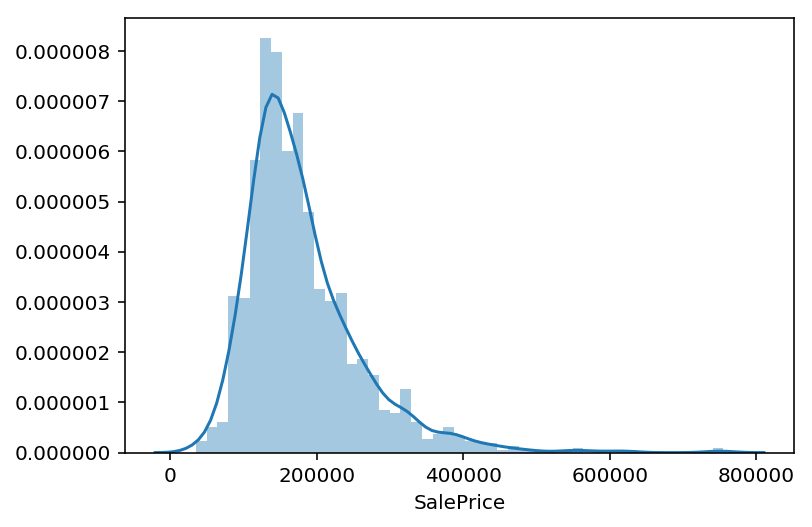

In [267]:
# SalePrice histogram
sns.distplot(train['SalePrice']);


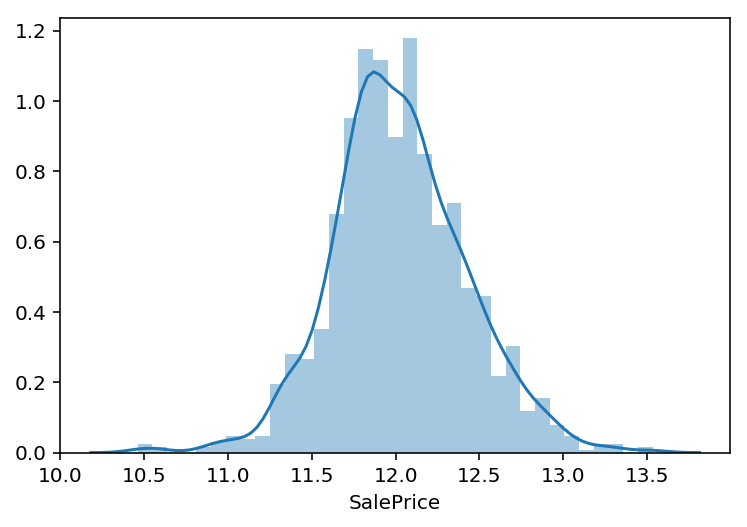

In [268]:
# Log transformation make it normal
sns.distplot(np.log(train['SalePrice']));
train['SalePrice_log'] = np.log(train['SalePrice'])

In [269]:
train['MoSold'] = train['MoSold'].astype('category')
train['YrSold'] = train['YrSold'].astype('category')
train['SaleType'] = train['SaleType'].astype('category')
train['SaleCondition'] = train['SaleCondition'].astype('category')
train['Neighborhood'] = train['Neighborhood'].astype('category')

# Explore GrLivArea

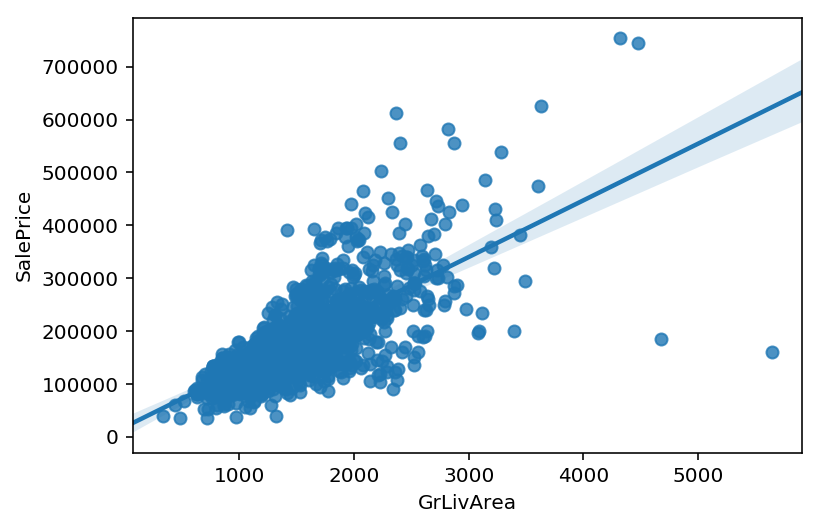

In [270]:
sns.regplot(x=train['GrLivArea'], y=train['SalePrice'], fit_reg=True)
plt.show()

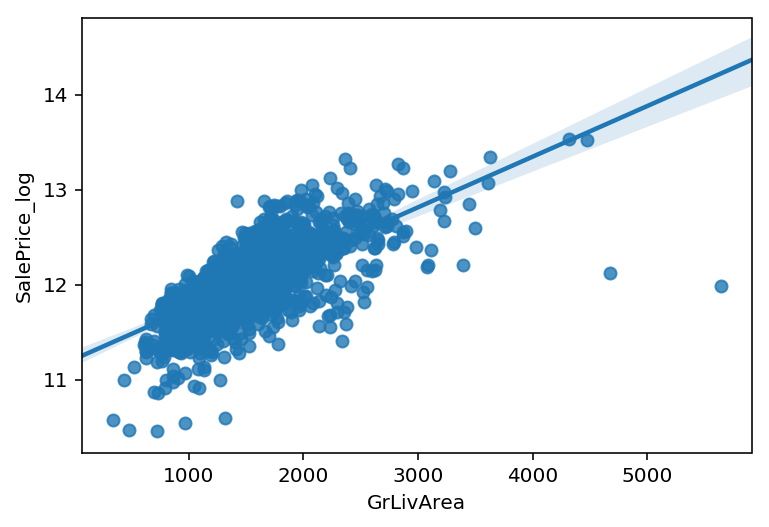

In [271]:
sns.regplot(x=train['GrLivArea'], y=train['SalePrice_log'], fit_reg=True)
plt.show()

In [272]:
pd.options.display.max_columns = None

train[train.GrLivArea > 4000]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,SalePrice_log
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
524,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,Inside,Gtl,Edwards,PosN,PosN,1Fam,2Story,10,5,2007,2008,Hip,CompShg,CemntBd,CmentBd,Stone,762.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,2260,Unf,0,878,3138,GasA,Ex,Y,SBrkr,3138,1538,0,4676,1,0,3,1,3,1,Ex,11,Typ,1,Gd,BuiltIn,2007.0,Fin,3,884,TA,TA,Y,208,406,0,0,0,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750,12.126759
692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,6,1994,1995,Gable,WdShngl,HdBoard,HdBoard,BrkFace,1170.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,1455,Unf,0,989,2444,GasA,Ex,Y,SBrkr,2444,1872,0,4316,0,1,3,1,4,1,Ex,10,Typ,2,Ex,Attchd,1994.0,Fin,3,832,TA,TA,Y,382,50,0,0,0,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000,13.534473
1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,5,1996,1996,Hip,CompShg,Wd Sdng,ImStucc,None,0.0,Gd,TA,PConc,Ex,TA,Av,GLQ,2096,Unf,0,300,2396,GasA,Ex,Y,SBrkr,2411,2065,0,4476,1,0,3,1,4,1,Ex,10,Typ,2,TA,Attchd,1996.0,Fin,3,813,TA,TA,Y,171,78,0,0,0,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000,13.521139
1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,Corner,Gtl,Edwards,Feedr,Norm,1Fam,2Story,10,5,2008,2008,Hip,ClyTile,Stucco,Stucco,Stone,796.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,5644,Unf,0,466,6110,GasA,Ex,Y,SBrkr,4692,950,0,5642,2,0,2,1,3,1,Ex,12,Typ,3,Gd,Attchd,2008.0,Fin,2,1418,TA,TA,Y,214,292,0,0,0,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000,11.982929


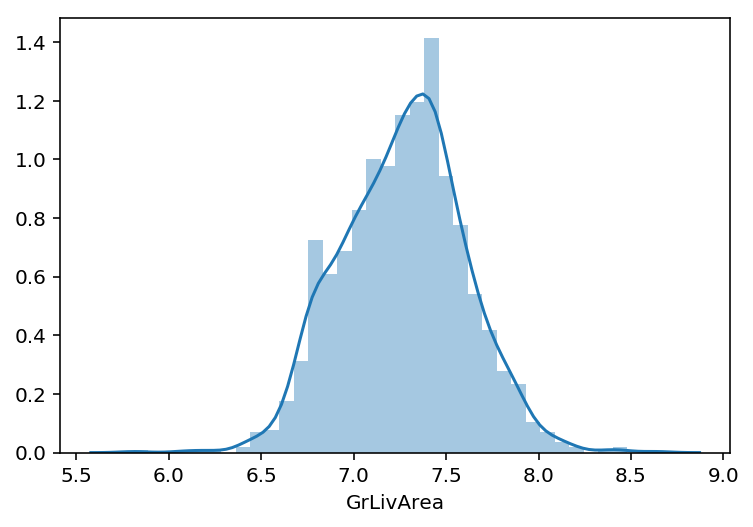

In [273]:
sns.distplot(np.log(train['GrLivArea']));


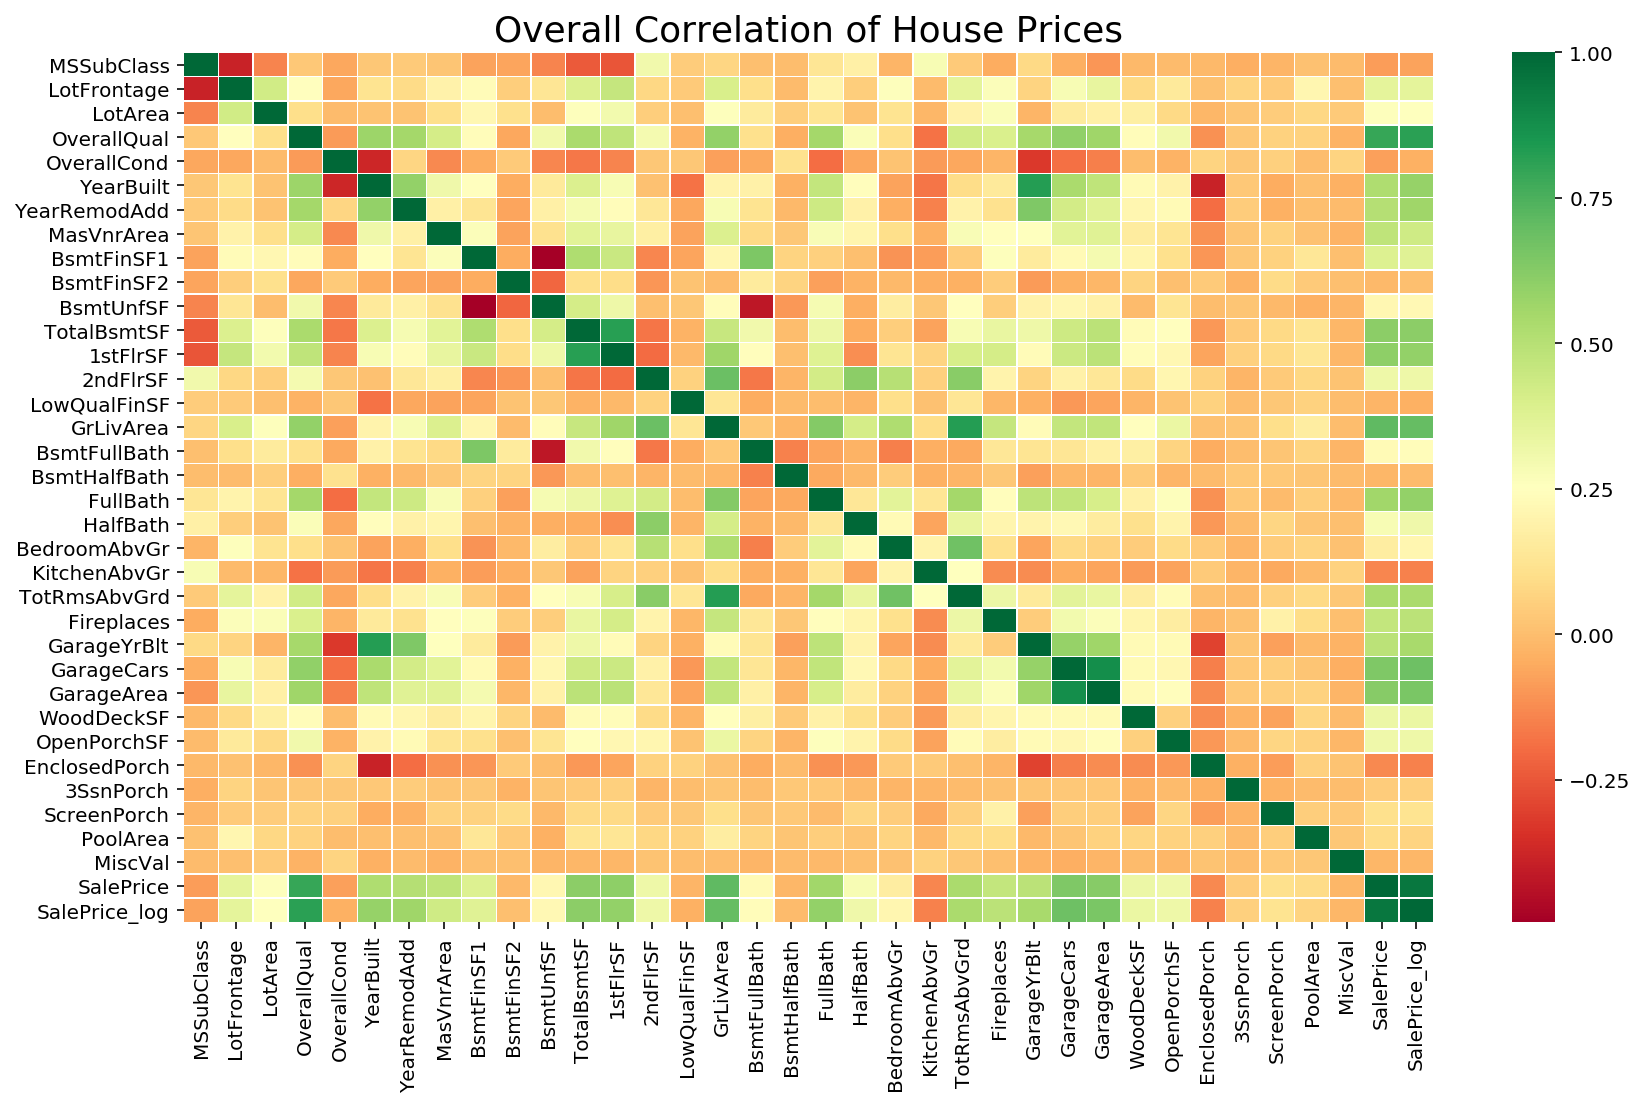

In [274]:
# Checking feature correlations
corr = train.corr()
plt.figure(figsize=(14, 8))
plt.title('Overall Correlation of House Prices', fontsize=18)
sns.heatmap(corr, annot=False,cmap='RdYlGn', linewidths=0.2, annot_kws={'size':20})
plt.show()

# MSSubClass

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

In [275]:
train['MSSubClass'] = [str(e) for e in train['MSSubClass']]

train = train.replace({'MSSubClass': 
{"20":"1-STORY 1946 & NEWER ALL STYLES",
        "30":"1-STORY 1945 & OLDER",
        "40":"1-STORY W/FINISHED ATTIC ALL AGES",
        "45":"1-1/2 STORY - UNFINISHED ALL AGES",
        "50":"1-1/2 STORY FINISHED ALL AGES",
        "60":"2-STORY 1946 & NEWER",
        "70":"2-STORY 1945 & OLDER",
        "75":"2-1/2 STORY ALL AGES",
        "80":"SPLIT OR MULTI-LEVEL",
        "85":"SPLIT FOYER",
        "90":"DUPLEX - ALL STYLES AND AGES",
       "120":"1-STORY PUD (Planned Unit Development) - 1946 & NEWER",
       "150":"1-1/2 STORY PUD - ALL AGES",
       "160":"2-STORY PUD - 1946 & NEWER",
       "180":"PUD - MULTILEVEL - INCL SPLIT LEV/FOYER",
       "190":"2 FAMILY CONVERSION - ALL STYLES AND AGES"}})

In [276]:
train['MSSubClass'].value_counts()

1-STORY 1946 & NEWER ALL STYLES                          536
2-STORY 1946 & NEWER                                     299
1-1/2 STORY FINISHED ALL AGES                            144
1-STORY PUD (Planned Unit Development) - 1946 & NEWER     87
1-STORY 1945 & OLDER                                      69
2-STORY PUD - 1946 & NEWER                                63
2-STORY 1945 & OLDER                                      60
SPLIT OR MULTI-LEVEL                                      58
DUPLEX - ALL STYLES AND AGES                              52
2 FAMILY CONVERSION - ALL STYLES AND AGES                 30
SPLIT FOYER                                               20
2-1/2 STORY ALL AGES                                      16
1-1/2 STORY - UNFINISHED ALL AGES                         12
PUD - MULTILEVEL - INCL SPLIT LEV/FOYER                   10
1-STORY W/FINISHED ATTIC ALL AGES                          4
Name: MSSubClass, dtype: int64

In [277]:
# Seems like a lot of information here. Lets make it work for us

train['1-STORY'] = train['MSSubClass'].str.contains('STORY').astype('int')
train['1-1/2 STORY'] = train['MSSubClass'].str.contains('1-1/2 STORY').astype('int')
train['2-STORY'] = train['MSSubClass'].str.contains('2-STORY').astype('int')
train['1946 & NEWER'] = train['MSSubClass'].str.contains('1946 & NEWER').astype('int')
train['1945 & OLDER'] = train['MSSubClass'].str.contains('1945 & OLDER').astype('int')
train['ALL STYLES'] = train['MSSubClass'].str.contains('ALL STYLES').astype('int')
train['AGES'] = train['MSSubClass'].str.contains('AGES').astype('int')
train['UNFINISHED'] = train['MSSubClass'].str.contains('UNFINISHED').astype('int')
train['PUD'] = train['MSSubClass'].str.contains('PUD').astype('int')
train['SPLIT'] = train['MSSubClass'].str.contains('SPLIT').astype('int')
train['FOYER'] = train['MSSubClass'].str.contains('FOYER').astype('int')

# MSZoning

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM	Residential Medium Density

In [278]:
train['Residential'] = train['MSZoning'].str.contains('R|FV').astype('int')


# Neighborhood



In [279]:
train['Neighborhood'].value_counts()

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
SWISU       25
StoneBr     25
Blmngtn     17
MeadowV     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

In [280]:
# LotArea
# Street
# Alley
# LotShape
# LandContour
# Utilities
# LotConfig
# LandSlope
# Neighborhood
# Condition1
# Condition2
# BldgType
# HouseStyle

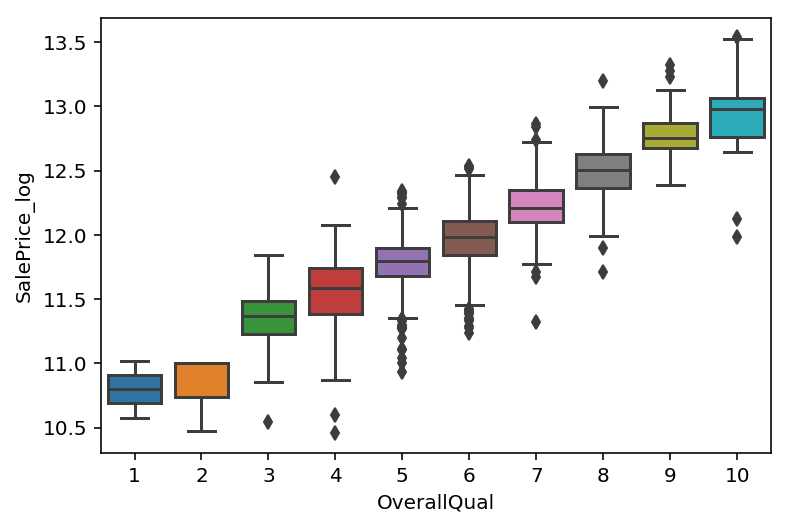

In [281]:
# OverallQual

#box plot overallqual/saleprice
fig = sns.boxplot(x='OverallQual', y="SalePrice_log", data=train)

In [282]:
train['OverallQual_0_1'] = (train['OverallQual'] <3).astype('int')
train['OverallQual_category'] = train['OverallQual'].astype('category')


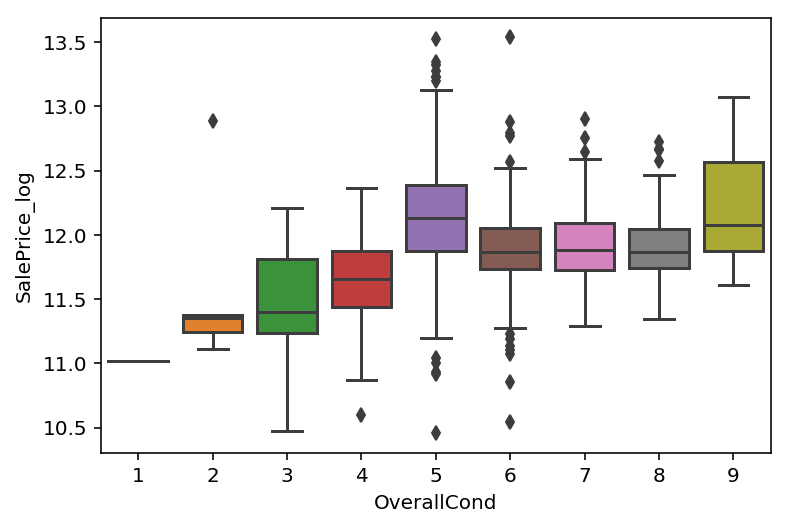

In [283]:
# OverallCond
fig = sns.boxplot(x='OverallCond', y="SalePrice_log", data=train)

In [284]:
train['OverallCond'] = train['OverallCond'].astype('category')


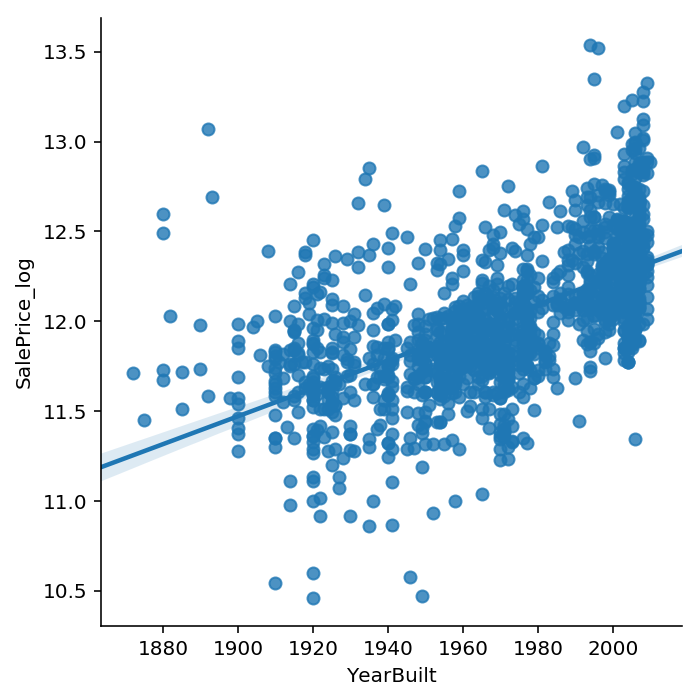

In [285]:
# YearBuilt
fig = sns.lmplot(x='YearBuilt', y="SalePrice_log", data=train)

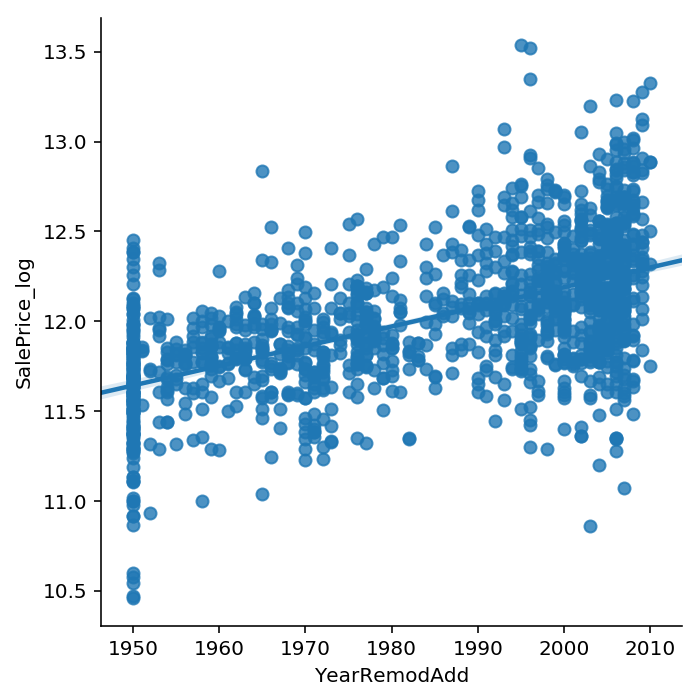

In [286]:

# YearRemodAdd

fig = sns.lmplot(x='YearRemodAdd', y="SalePrice_log", data=train)

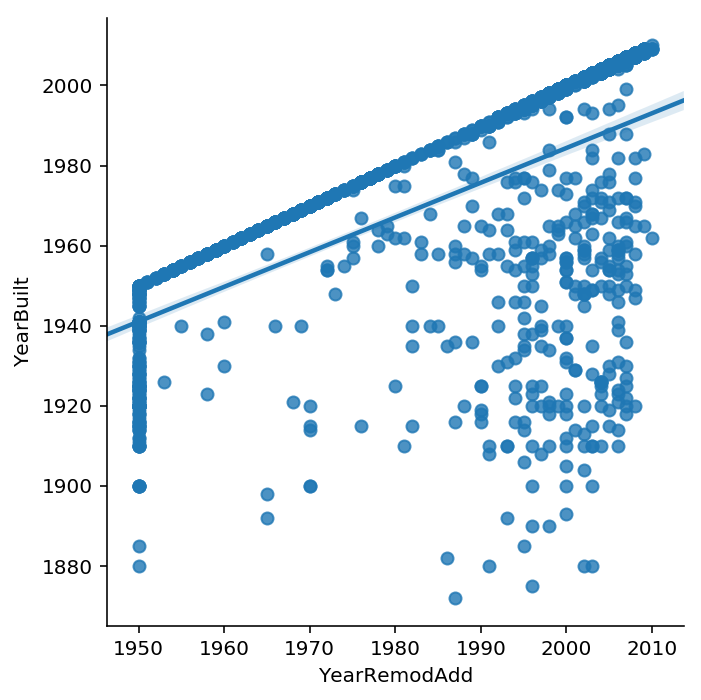

In [287]:
fig = sns.lmplot(x='YearRemodAdd', y="YearBuilt", data=train)

In [288]:
train['YearRemodAdd'] = np.where(train.YearRemodAdd.astype('int') == 1950, train.YearBuilt, train.YearRemodAdd)
train['is_remod_add'] = np.where(train.YearRemodAdd.astype('int') == train.YearBuilt.astype('int'), 0, 1)



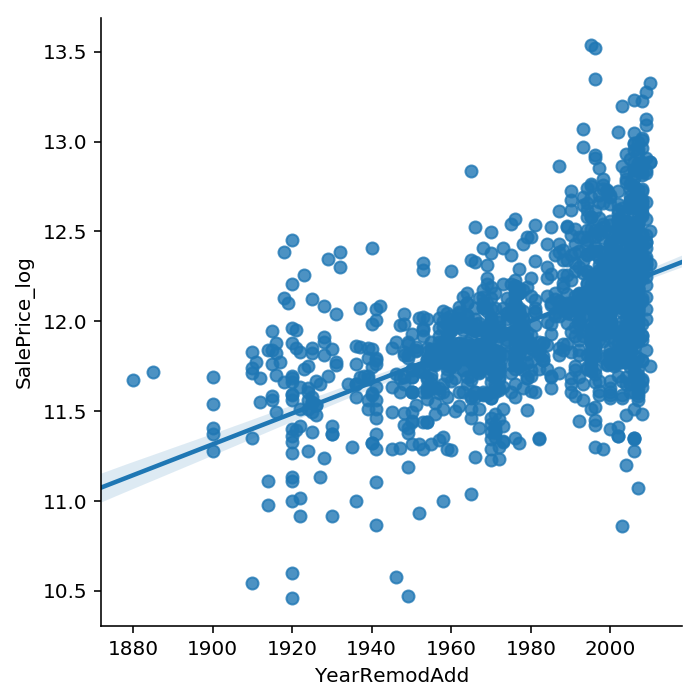

In [289]:
fig = sns.lmplot(x='YearRemodAdd', y="SalePrice_log", data=train)

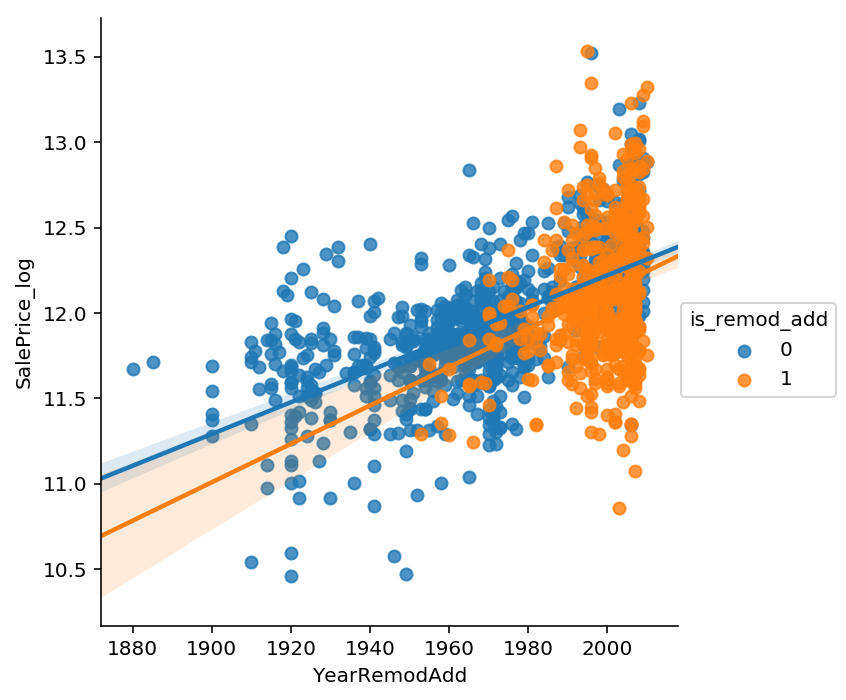

In [290]:
fig = sns.lmplot(x='YearRemodAdd', y="SalePrice_log", hue="is_remod_add", data=train)


In [291]:
# RoofStyle
train['RoofStyle'].value_counts()

Gable      1141
Hip         286
Flat         13
Gambrel      11
Mansard       7
Shed          2
Name: RoofStyle, dtype: int64

In [292]:
# RoofMatl
train['RoofMatl'].value_counts()

CompShg    1434
Tar&Grv      11
WdShngl       6
WdShake       5
ClyTile       1
Membran       1
Metal         1
Roll          1
Name: RoofMatl, dtype: int64

In [293]:
# Exterior1st
train['Exterior1st'].value_counts()

VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
Stone        2
BrkComm      2
AsphShn      1
ImStucc      1
CBlock       1
Name: Exterior1st, dtype: int64

In [294]:
# Exterior2nd
train['Exterior2nd'].value_counts()

VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    197
Plywood    142
CmentBd     60
Wd Shng     38
Stucco      26
BrkFace     25
AsbShng     20
ImStucc     10
Brk Cmn      7
Stone        5
AsphShn      3
CBlock       1
Other        1
Name: Exterior2nd, dtype: int64

In [295]:
Exteriors = train.Exterior1st.append(train.Exterior2nd, ignore_index=True).unique()
Exteriors

array(['VinylSd', 'MetalSd', 'Wd Sdng', 'HdBoard', 'BrkFace', 'WdShing',
       'CemntBd', 'Plywood', 'AsbShng', 'Stucco', 'BrkComm', 'AsphShn',
       'Stone', 'ImStucc', 'CBlock', 'Wd Shng', 'CmentBd', 'Brk Cmn',
       'Other'], dtype=object)

In [296]:
for e in Exteriors:
    train[e] = ((train['Exterior1st'] == e)| (train['Exterior2nd'] == e)).astype('int')
    

In [297]:
train.drop(['Exterior1st', 'Exterior2nd'], inplace=True, axis = 1)

In [298]:
train.columns.values

array(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional',
       'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF

In [299]:
# MasVnrType
train['MasVnrType'].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [300]:
print(train['MasVnrType'].isnull().sum())
train['MasVnrType'].fillna('None', inplace=True)
print(train['MasVnrType'].isnull().sum())

8
0


In [301]:
train['MasVnrType'].value_counts()

None       872
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [310]:
# MasVnrArea: Masonry veneer area in square feet

print(train['MasVnrArea'].isnull().sum())


0


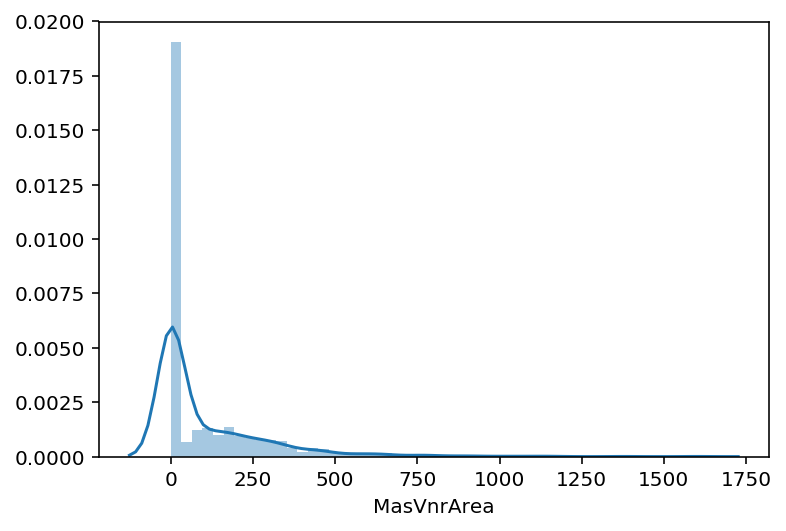

In [303]:
train['MasVnrArea'].fillna(train.MasVnrArea.median(), inplace = True)
sns.distplot(a=train['MasVnrArea'])

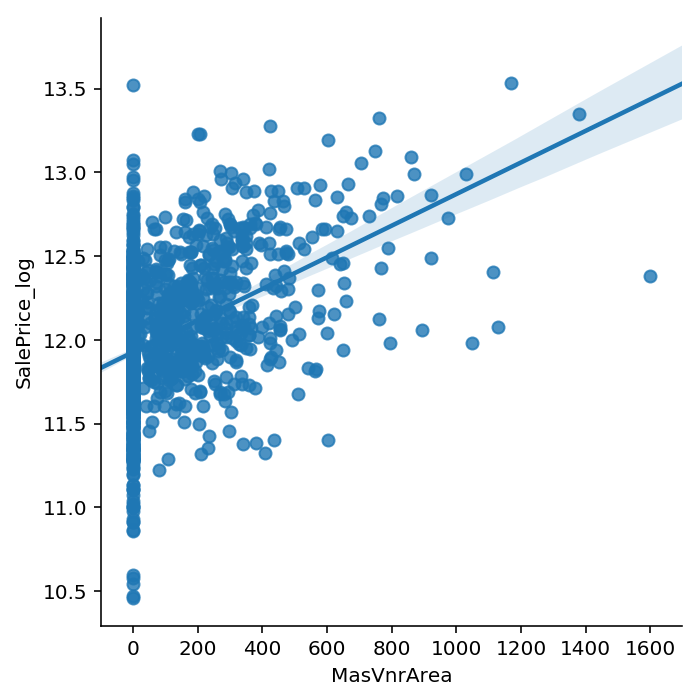

In [304]:
fig = sns.lmplot(x='MasVnrArea', y="SalePrice_log", data=train)

In [305]:
train['is_MasVnr'] = (train['MasVnrArea'] > 0).astype('int')

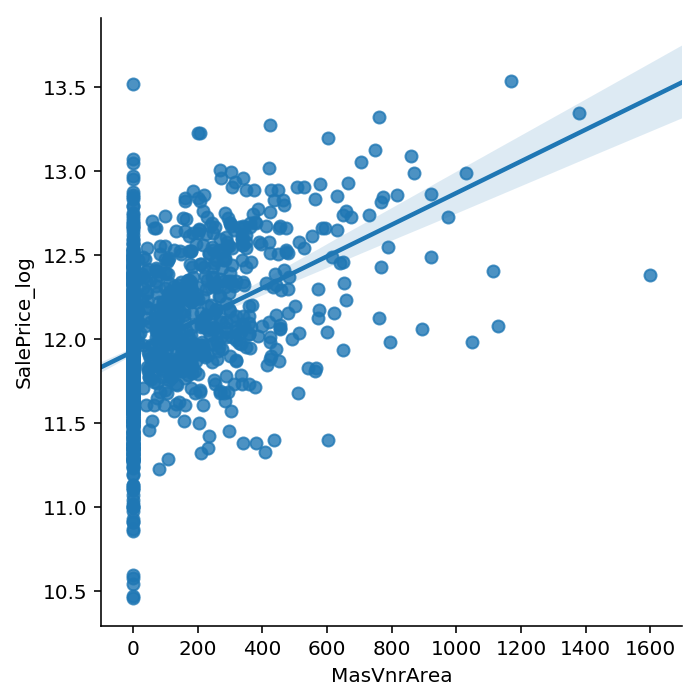

In [306]:
sns.lmplot(x='MasVnrArea', y="SalePrice_log", data=train)

In [307]:
train['MasVnrArea'].mean()

103.11712328767123

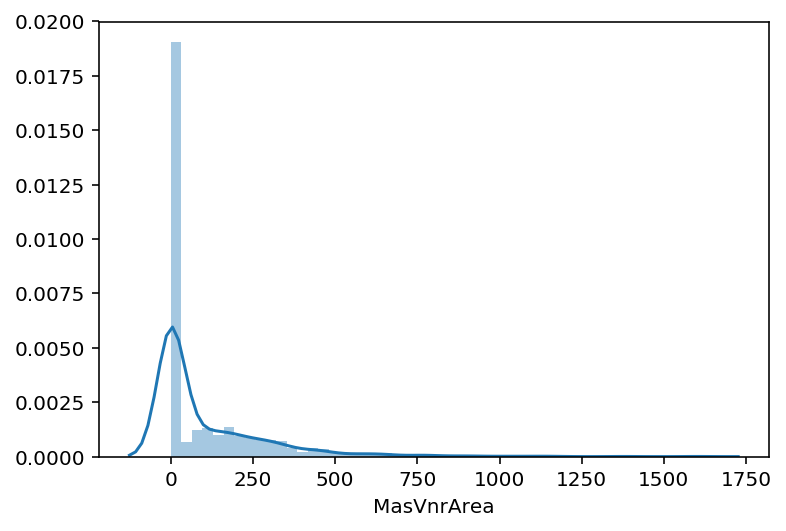

In [308]:
sns.distplot(a=train['MasVnrArea'])

In [313]:
# ExterQual
train['ExterQual'].value_counts()

TA    906
Gd    488
Ex     52
Fa     14
Name: ExterQual, dtype: int64

In [ ]:
# ExterQual: Evaluates the quality of the material on the exterior 
map = {'Ex':4
       'Gd':3
       'TA':2,
       'Fa':1,
       'Po':0}

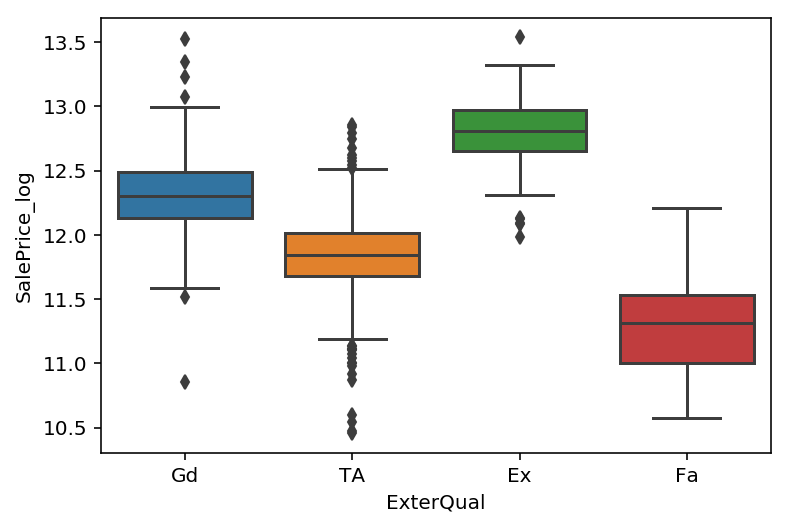

In [312]:
fig = sns.boxplot(x='ExterQual', y="SalePrice_log", data=train)

In [ ]:
# ExterCond


In [ ]:
# Foundation

In [ ]:
# BsmtQual

In [ ]:
# BsmtCond

In [ ]:
# BsmtExposure

In [ ]:
# BsmtFinType1
# BsmtFinType2

In [ ]:
# BsmtFinSF1
# BsmtFinSF2

In [309]:
# BsmtUnfSF
# TotalBsmtSF
# Heating
# HeatingQC
# CentralAir
# Electrical
# 1stFlrSF
# 2ndFlrSF
# LowQualFinSF
# GrLivArea
# BsmtFullBath
# BsmtHalfBath
# FullBath
# HalfBath
# BedroomAbvGr
# KitchenAbvGr
# KitchenQual
# TotRmsAbvGrd
# Functional
# Fireplaces
# FireplaceQu
# GarageType
# GarageYrBlt
# GarageFinish
# GarageCars
# GarageArea
# GarageQual
# GarageCond
# PavedDrive
# WoodDeckSF
# OpenPorchSF
# EnclosedPorch
# 3SsnPorch
# ScreenPorch
# PoolArea
# PoolQC
# Fence
# MiscFeature
# MiscVal
# MoSold
# YrSold
# SaleType
# SaleCondition
# SalePrice
# SalePrice_log

# To do : 
- add predicted price and re-run regression as a second level with random forest or xgboost
